# Classification 
In this notebook, the classification with LDA and QDA is illustrated on the Digits data set.

In [1]:
 from sklearn.datasets import load_digits
# Load digits
X, y = load_digits(return_X_y=True)
print(X.shape)
print(X.max())

(1797, 64)
16.0


The data set is made available by NIST to extract normalized bitmaps of handwritten digits from a preprinted form. From a total of 43 people, 30 contributed to the training set and different 13 to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16 (https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits)

We can visualize the data by reshaping correctly each sample:

Text(0.5,1,'Label = 4')

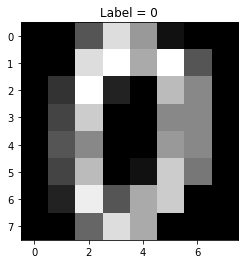

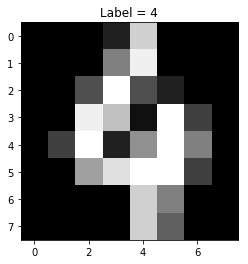

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the first element
plt.figure()
plt.imshow(X[0,:].reshape(8,8),cmap="gray")
plt.title("Label = {}".format(y[0]))

# Plot the hundredth element
plt.figure()
plt.imshow(X[100,:].reshape(8,8),cmap="gray")
plt.title("Label = {}".format(y[100]))

To perform the classification and the validation of the model, we should split our data sets into two disjoint parts. The classification accuracy is assessed using the global accuracy.

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA,\
                                        QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score as OA

# Split the data -> train_size=0.40 means we keep 40% of the data for training and 80% fir validation
# The stratification ensures that the proportion of each class from the orginal data is preserved in 
# the train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)

MODELS = [LDA(), QDA()]
oa = []
for model in MODELS:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    oa.append(OA(y_test, y_pred))
print(oa)

[0.9513212795549374, 0.8789986091794159]


/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Setting up hyperparameters
Both LDA and QDA have hyperparameters, which are related to the estimation of the covariance matrices. They usually have significant influences on the final classification results. 

For instance, QDA implemented in Sklearn has a regulation parameter $\lambda$ that controls the condition number of the class covariance matrix: 
$$(1-\lambda) \Sigma + \lambda I_p $$ 
The following code shows the influence of this hyperparameter on the overall accuracy.

In [6]:
import scipy as sp
reg_param = sp.linspace(0,1)
print(reg_param)

[0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables a

/localdata/chatelaf/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


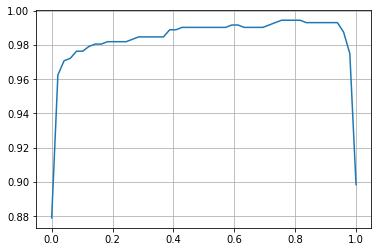

In [7]:
oa = []
for reg_param_ in reg_param:
    model = QDA(reg_param=reg_param_)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    oa.append(OA(y_test, y_pred))
plt.plot(reg_param, oa)
plt.grid()

In [6]:
print("Best hyperparameters value: {}".format(reg_param[sp.argmax(oa)]))

Best hyperparameters value: 0.836734693877551
